In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
boro = gpd.read_file('../data/Borough Boundaries.geojson')
print(boro.crs)
boro.head()

epsg:4326


,boro_code,boro_name,shape_area,shape_leng,geometry
0,1,Manhattan,636603803.361,361611.82395,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
1,2,Bronx,1187244527.16,464650.051807,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,3,Brooklyn,1934091246.43,729592.941749,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,4,Queens,3044042308.42,900087.667191,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."
4,5,Staten Island,1623757282.78,325956.009,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."


In [43]:
type(boro.geometry)

geopandas.geoseries.GeoSeries

<AxesSubplot:>

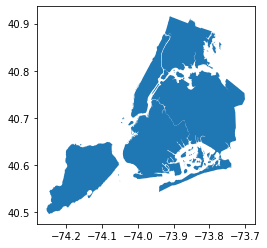

In [4]:
boro.plot()

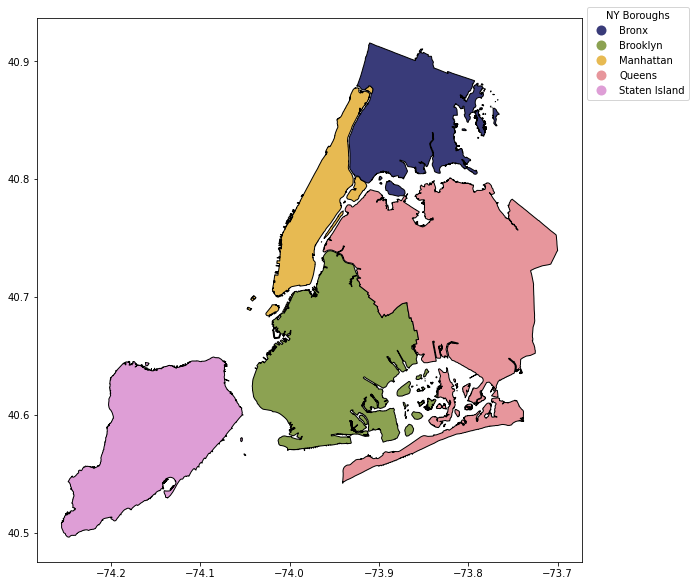

In [5]:
leg_kwds = {'title': 'NY Boroughs', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03)}

boro.plot(column = 'boro_name', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'tab20b')
plt.show()

In [6]:
subway = gpd.read_file('../data/Subway Stations.geojson')
print(subway.crs)
subway.head()

epsg:4326


,name,url,line,objectid,notes,geometry
0,Astor Pl,http://web.mta.info/nyct/service/,4-6-6 Express,1,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (-73.99107 40.73005)
1,Canal St,http://web.mta.info/nyct/service/,4-6-6 Express,2,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (-74.00019 40.71880)
2,50th St,http://web.mta.info/nyct/service/,1-2,3,"1-all times, 2-nights",POINT (-73.98385 40.76173)
3,Bergen St,http://web.mta.info/nyct/service/,2-3-4,4,"4-nights, 3-all other times, 2-all times",POINT (-73.97500 40.68086)
4,Pennsylvania Ave,http://web.mta.info/nyct/service/,3-4,5,"4-nights, 3-all other times",POINT (-73.89489 40.66471)


In [7]:
subway.info

<bound method DataFrame.info of                             name                                url  \
0                       Astor Pl  http://web.mta.info/nyct/service/   
1                       Canal St  http://web.mta.info/nyct/service/   
2                        50th St  http://web.mta.info/nyct/service/   
3                      Bergen St  http://web.mta.info/nyct/service/   
4               Pennsylvania Ave  http://web.mta.info/nyct/service/   
..                           ...                                ...   
468  Coney Island - Stillwell Av  http://web.mta.info/nyct/service/   
469       34th St - Hudson Yards  http://web.mta.info/nyct/service/   
470                      72nd St  http://web.mta.info/nyct/service/   
471                      86th St  http://web.mta.info/nyct/service/   
472                      96th St  http://web.mta.info/nyct/service/   

              line objectid  \
0    4-6-6 Express        1   
1    4-6-6 Express        2   
2              1-2    

In [8]:
subway_geo = gpd.GeoDataFrame(subway, 
                           crs = boro.crs, 
                           geometry = subway['geometry'])

In [10]:
stations_in_boro = gpd.sjoin(subway_geo, boro, op = 'within')
stations_in_boro.head()

,name,url,line,objectid,notes,geometry,index_right,boro_code,boro_name,shape_area,shape_leng
0,Astor Pl,http://web.mta.info/nyct/service/,4-6-6 Express,1,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (-73.99107 40.73005),0,1,Manhattan,636603803.361,361611.82395
1,Canal St,http://web.mta.info/nyct/service/,4-6-6 Express,2,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (-74.00019 40.71880),0,1,Manhattan,636603803.361,361611.82395
2,50th St,http://web.mta.info/nyct/service/,1-2,3,"1-all times, 2-nights",POINT (-73.98385 40.76173),0,1,Manhattan,636603803.361,361611.82395
6,Cathedral Pkwy (110th St),http://web.mta.info/nyct/service/,A-B-C,7,"A-nights, B-weekdays and evenings, C-all times...",POINT (-73.95807 40.80058),0,1,Manhattan,636603803.361,361611.82395
10,Delancey St - Essex St,http://web.mta.info/nyct/service/,J-M-Z,11,"J-all times, M-all times exc nights, Z-rush ho...",POINT (-73.98741 40.71831),0,1,Manhattan,636603803.361,361611.82395


In [26]:
stations_in_boro['boro_name'].value_counts()

Brooklyn     169
Manhattan    152
Queens        82
Bronx         70
Name: boro_name, dtype: int64

In [34]:
brook_stations = stations_in_boro.loc[stations_in_boro['boro_name'] == 'Brooklyn']
manh_stations = stations_in_boro.loc[stations_in_boro['boro_name'] == 'Manhattan']
brook_stations.head()

,name,url,line,objectid,notes,geometry,index_right,boro_code,boro_name,shape_area,shape_leng
3,Bergen St,http://web.mta.info/nyct/service/,2-3-4,4,"4-nights, 3-all other times, 2-all times",POINT (-73.97500 40.68086),2,3,Brooklyn,1934091246.43,729592.941749
4,Pennsylvania Ave,http://web.mta.info/nyct/service/,3-4,5,"4-nights, 3-all other times",POINT (-73.89489 40.66471),2,3,Brooklyn,1934091246.43,729592.941749
7,Kingston - Throop Aves,http://web.mta.info/nyct/service/,A-C,8,"A-nights, C-all other times",POINT (-73.94086 40.67992),2,3,Brooklyn,1934091246.43,729592.941749
11,Van Siclen Ave,http://web.mta.info/nyct/service/,J-Z,12,"Z-rush hours AM westbound, PM eastbound, J-all...",POINT (-73.89166 40.67803),2,3,Brooklyn,1934091246.43,729592.941749
12,Norwood Ave,http://web.mta.info/nyct/service/,J-Z,13,"Z-rush hours AM westbound, PM eastbound, J-all...",POINT (-73.87963 40.68152),2,3,Brooklyn,1934091246.43,729592.941749


In [35]:
brook_boro = boro.loc[boro['boro_name'] == 'Brooklyn']
manh_boro = boro.loc[boro['boro_name'] == 'Manhattan']

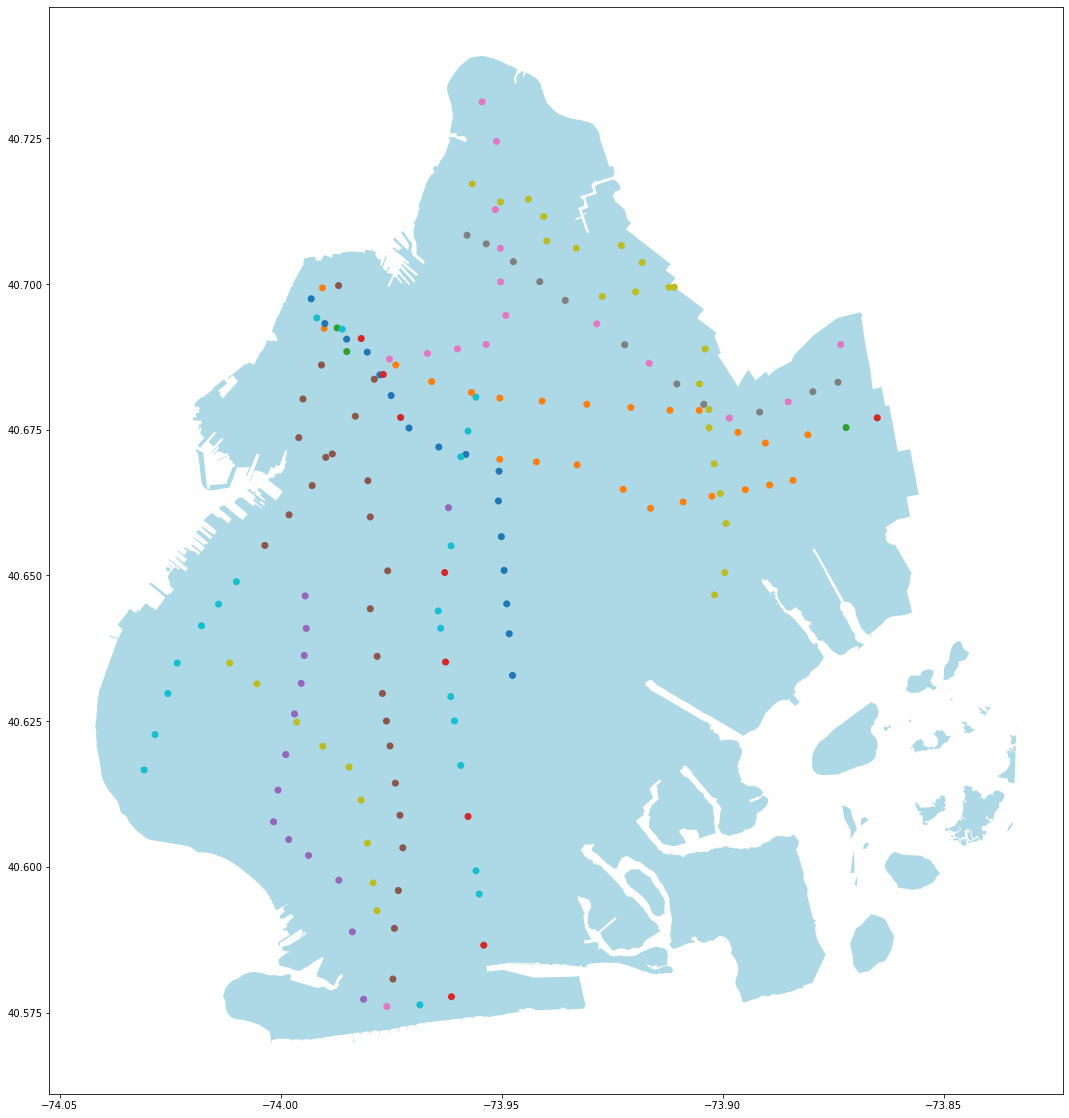

In [36]:
ax = brook_boro.plot(figsize = (20, 20), color = 'lightblue')
brook_stations.plot( ax = ax, column = 'line');
plt.show();

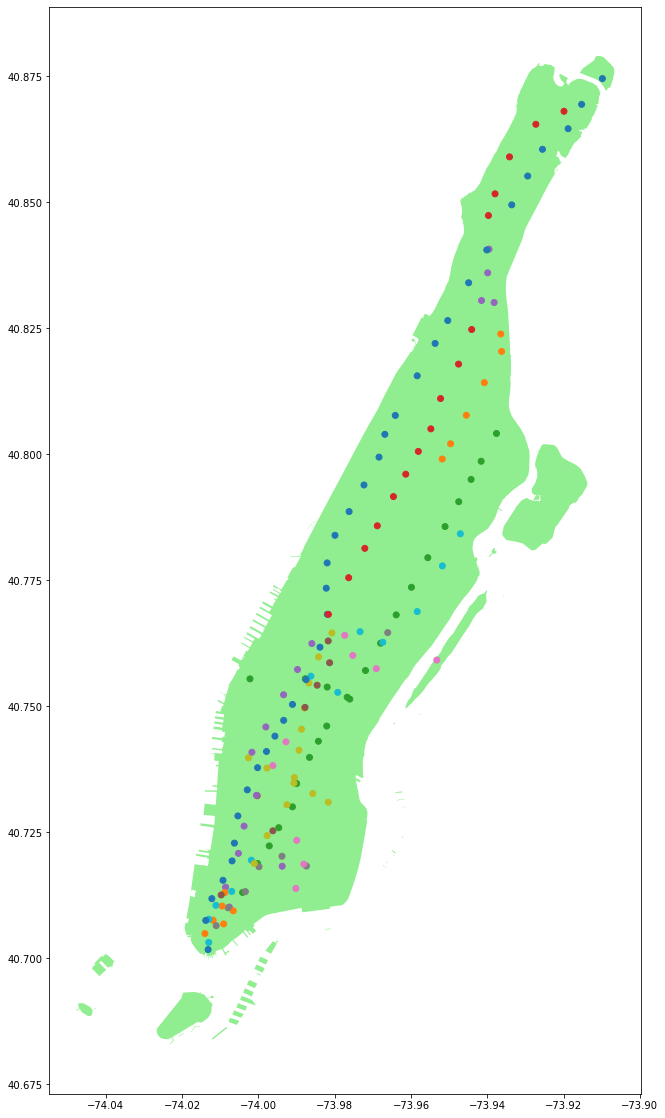

In [37]:
ax = manh_boro.plot(figsize = (20, 20), color = 'lightgreen')
manh_stations.plot( ax = ax, column = 'line');
plt.show();

In [38]:
brook_boro.geometry.centroid

<ipython-input-38-8775b8e49a3d>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  brook_boro.geometry.centroid


2    POINT (-73.94785 40.64476)
dtype: geometry

In [41]:
brook_center = brook_boro.geometry.centroid[2]
b_area_center = [brook_center.y, brook_center.x]

<ipython-input-41-f96243b531d1>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  brook_center = brook_boro.geometry.centroid[2]


In [42]:
brook_boro.geometry

2    MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...
Name: geometry, dtype: geometry

In [52]:
map_brook = folium.Map(location = b_area_center, zoom_start = 13)

folium.GeoJson(brook_boro).add_to(map_brook)

for row_index, row_values in brook_stations.iterrows():
    loc = [row_values['geometry'].y, row_values['geometry'].x]
    pop = str(row_values['line'])
    icon=folium.Icon(color="orange",icon="train", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_brook)
map_brook.save('../maps/map_brook.html')
    
map_brook